<a href="https://colab.research.google.com/github/danieldrako/Matematicas-para-Data-Science-Probabilidad/blob/main/01Distribuci%C3%B3n_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [ ]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [ ]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5))) #2 caras de 3 lanzamintos con probabilidad equilibrada 
dist = binom(3, 0.5)
dist.pmf(2) #probability mass function 
#se obtieene los mismo

my binomial: 0.375


0.3750000000000001



$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [ ]:
print(7/8.0)
dist.cdf(2)#cumulative density function

0.875


0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [ ]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p) #viene de numpy random 

1

In [ ]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
#lanza una moneda 100 veces 
arr = []
for _ in range(100):
  arr.append(binomial(n, p))


np.unique(arr, return_counts=True)[1]

array([11, 44, 37,  8])

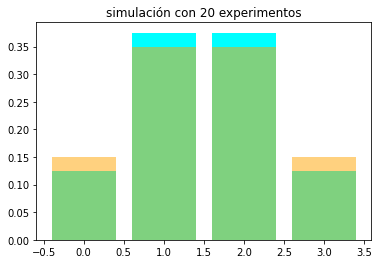

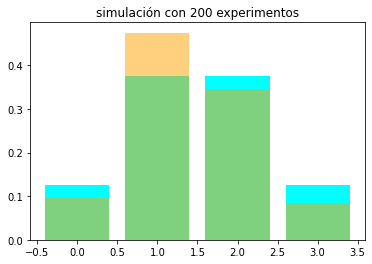

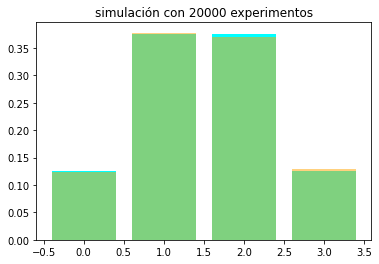

In [ ]:
def plot_hist(num_trials):
  values = [0,1,2,3] # de 3 lanzamientos puedo obtener  0 caras, 1cara, 2caras, 3 caras
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)# identifica valores unicos en una lista y lista cuantas
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'cyan')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'orange')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)